In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


### 載入 Iris 資料集並選取兩個類別 (Setosa 和 Versicolor)

In [4]:
iris = datasets.load_iris()
X = iris.data[iris.target != 2, 0].reshape(-1, 1)  # 花萼長度（第一個特徵），並重塑為 1D
y = iris.target[iris.target != 2]  # Setosa 和 Versicolor 標籤

### 顯示 Iris 資料集的資料

In [26]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

# 選取 Setosa 和 Versicolor 的花萼長度資料
iris_df['species'] = iris_df['species'].map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})
filtered_df = iris_df[iris_df['species'].isin(['Setosa', 'Versicolor'])][['species', 'sepal length (cm)']]

# 以表格方式顯示資料
filtered_df

,species,sepal length (cm)
0,Setosa,5.1
1,Setosa,4.9
2,Setosa,4.7
3,Setosa,4.6
4,Setosa,5.0
...,...,...
95,Versicolor,5.7
96,Versicolor,5.7
97,Versicolor,6.2
98,Versicolor,5.1


### 資料集分割為訓練集和測試集

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 資料標準化

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 建立 SVM 模型和 Logistic Regression 模型

In [8]:
svm_model = SVC(kernel='linear')
logistic_model = LogisticRegression()

### 訓練模型

In [9]:
svm_model.fit(X_train, y_train)
logistic_model.fit(X_train, y_train)

LogisticRegression()

### 預測

In [10]:
y_pred_svm = svm_model.predict(X_test)
y_pred_logistic = logistic_model.predict(X_test)

### 計算準確率

In [11]:
svm_accuracy = accuracy_score(y_test, y_pred_svm)
logistic_accuracy = accuracy_score(y_test, y_pred_logistic)

print(f"SVM Accuracy: {svm_accuracy:.2f}")
print(f"Logistic Regression Accuracy: {logistic_accuracy:.2f}")

SVM Accuracy: 0.90
Logistic Regression Accuracy: 0.93


### 繪製分類邊界

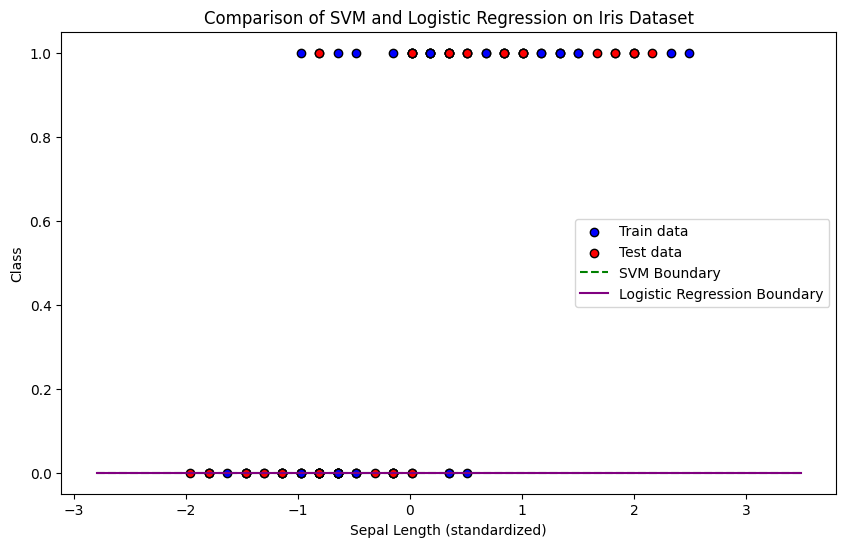

In [12]:
plt.figure(figsize=(10, 6))

# 建立虛擬資料點以視覺化分類邊界
x_range = np.linspace(X_train.min() - 1, X_train.max() + 1, 100).reshape(-1, 1)
x_range_scaled = scaler.transform(x_range)

# SVM 和 Logistic Regression 的分類預測
y_range_svm = svm_model.predict(x_range_scaled)
y_range_logistic = logistic_model.predict(x_range_scaled)

# 畫出資料點
plt.scatter(X_train, y_train, color='blue', label='Train data', edgecolor='k')
plt.scatter(X_test, y_test, color='red', label='Test data', edgecolor='k')

# 畫出 SVM 和 Logistic Regression 的分類邊界
plt.plot(x_range, y_range_svm, color='green', linestyle='--', label='SVM Boundary')
plt.plot(x_range, y_range_logistic, color='purple', linestyle='-', label='Logistic Regression Boundary')

plt.xlabel("Sepal Length (standardized)")
plt.ylabel("Class")
plt.legend()
plt.title("Comparison of SVM and Logistic Regression on Iris Dataset")
plt.show()